# MLP Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file = r'/content/drive/MyDrive/Colab/mlp-mcr/dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(file)

# dataset
dataset = df.values
X = dataset[:, 6] # mt column
Y = dataset[:, 5] # mcr column

In [ ]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)

# split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# size
print("Train: ", X_train.shape)
print("Val: ", X_val.shape)
print("Test: ", X_test.shape)

Train:  (115196, 1)
Val:  (28800, 1)
Test:  (36000, 1)


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),
                   activation="relu",
                   solver="adam",
                   alpha=0.001,
                   learning_rate="adaptive",
                   learning_rate_init=0.00005,
                   max_iter=7000)

mlp.fit(X_train, Y_train)
mlp.score(X_val, Y_val)

0.6124194077952756

In [ ]:
Y_predict = mlp.predict(X_val)

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
mape = mean_absolute_percentage_error(Y_val, Y_predict)
mae = mean_absolute_error(Y_val, Y_predict)
mse = mean_squared_error(Y_val, Y_predict)
print("MAPE : ", mape)
print("MAE : ", mae)
print("MSE : ", mse)

MAPE :  17.17917372129427
MAE :  12.468716027084152
MSE :  9362.425853401948


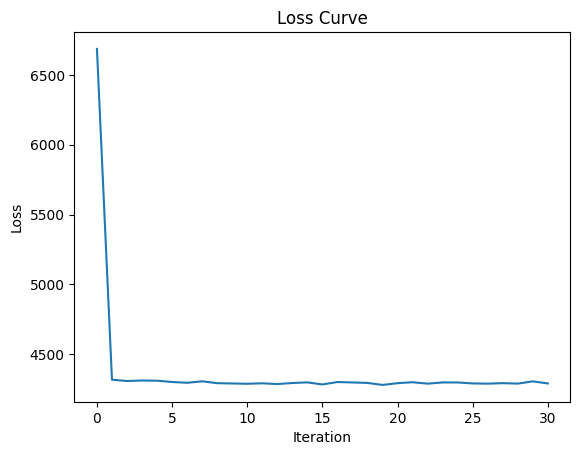

In [ ]:
import matplotlib.pyplot as plt

loss_curve = mlp.loss_curve_

plt.plot(loss_curve)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()